In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%run pipeline.py
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
#plt.rcParams['ytick.left'] = True
#plt.rcParams['ytick.right'] = True
#plt.rcParams['xtick.top'] = True
#plt.rcParams['xtick.bottom'] = True
#plt.rcParams['ytick.minor.visible'] = True

In [8]:
path = '10arcmin_full'
sims = os.listdir('./%s'%path)

spec_q = []
spec_dla = []
for file in sims:
    if file.split('.')[0].split('_')[-1] == 'q':
        data = np.load('./%s/%s'%(path,file))
        spec_q.append(data)
    if file.split('.')[0].split('_')[-1] == 'dla':
        data = np.load('./%s/%s'%(path,file))
        spec_dla.append(data)
        
spec_q = np.concatenate(spec_q)
spec_dla = np.concatenate(spec_dla)


def bin_corr(c_kq,l_min=30,l_max=1200,band=15):   # bin the power-spectrum

    width = int((l_max-l_min)/band)                    # number of l in each bin
    bin_set = np.zeros((band,1))

    for i in range(band):
        bin_set[i] = np.mean(c_kq[l_min+(width*i):l_min+width*(i+1)])   # the value for each bin

    bin_l = [np.mean([l_min+width*i,l_min+(i+1)*width]) for i in range(band)] # the corresponding l for each bin
    return bin_l, bin_set

sp_q = []
for i in spec_q:
    ll,ccll = bin_corr(i.flatten(),l_min=100,l_max=1200,band=10)
    sp_q.append(ccll)
cov_q = np.cov(np.array(sp_q).T[0],bias=False)


sp_dla = []
for i in spec_dla:
    ll,ccll = bin_corr(i.flatten(),l_min=100,l_max=1200,band=10)
    sp_dla.append(ccll)
cov_dla = np.cov(np.array(sp_dla).T[0],bias=False)

cov =  np.cov(np.array(sp_q).T[0],np.array(sp_dla).T[0],bias=False)

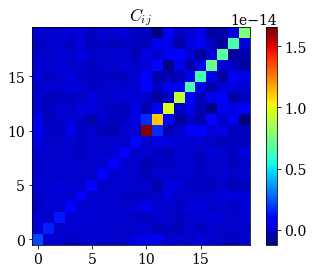

/home/littlelin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: bias and ddof have no effect and are deprecated
  


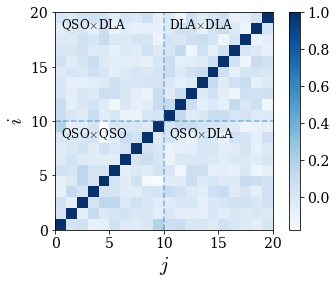

In [19]:
plt.imshow(cov,origin='lower',cmap='jet')
plt.colorbar()
plt.title(r'$C_{ij}$')
plt.show()

r = np.corrcoef(np.array(sp_q).T[0],np.array(sp_dla).T[0],bias=False)
plt.imshow(r,origin='lower',cmap='Blues',extent=[0.,20.,0.,20.])
#plt.xticks(np.arange(1,21,2))
#plt.yticks(np.arange(1,21,2))
plt.axhline(y=10.,ls='--',alpha=0.5)
plt.axvline(x=10.,ls='--',alpha=0.5)
plt.text(x=0.5,y=8.5,s=r'QSO$\times$QSO',fontsize=12)
plt.text(x=10.5,y=18.5,s=r'DLA$\times$DLA',fontsize=12)
plt.text(x=0.5,y=18.5,s=r'QSO$\times$DLA',fontsize=12)
plt.text(x=10.5,y=8.5,s=r'QSO$\times$DLA',fontsize=12)
plt.colorbar()
plt.xlabel(r'$j$',fontsize=20)
plt.ylabel(r'$i$',fontsize=20)
plt.savefig('cov_qxd.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
